# Fundamental Abstract Data Types

In this notebook, we implement stacks and queues by means of doubly linked lists, so let's include their implementation:


In [1]:
class Node:
    def __init__(self, item, next=None, prev=None):
        self.item = item
        self.next = next
        self.prev = prev

class DoublyLinkedList:
    def __init__(self):
        self.first = None
        self.last = None
 
    def is_empty(self):
        return self.first is None
 
    def prepend(self, item):
        if self.is_empty():
            self.first = Node(item)
            self.last = self.first
        else:
            node = Node(item, self.first, None)
            self.first.prev = node
            self.first = node
 
    def append(self, item):
        if self.is_empty():
            self.first = Node(item)
            self.last = self.first
        else:
            node = Node(item, None, self.last)
            self.last.next = node
            self.last = node
 
    def remove_first(self):
        # may only be called on non-empty list
        assert not self.is_empty()
        item = self.first.item
        self.first = self.first.next
        if self.first is not None:
            self.first.prev = None
        else:
            self.last = None
        return item
 
    def remove_last(self):
        # may only be called on non-empty list
        assert not self.is_empty()
        item = self.last.item
        self.last = self.last.prev
        if self.last is not None:
            self.last.next = None
        else:
            self.first = None
        return item
 
    def print(self):
        print("[", end="")
        current_node = self.first
        while (current_node != None):
            end = "" if current_node.next is None else ", "
            print(current_node.item, end=end)
            current_node = current_node.next
        print("]")

## Stack

We first implement stacks. The most important operations are `push` and `pop`. A simple strategy is that a `push` operation prepends to the list and the `pop` operation removes and returns the first element from the list. Both operations take only constant time.

In [2]:
class Stack:
    def __init__(self):
        self.list = DoublyLinkedList()
        self.num_elements = 0

    def is_empty(self):
        return self.list.is_empty()

    def size(self):
        return self.num_elements
    
    def push(self, item):
        self.list.prepend(item)
        self.num_elements += 1
        
    def pop(self):
        if self.list.is_empty():
            raise Exception("popping from empty stack")
        else:
            self.num_elements -= 1
            return self.list.remove_first()

    def print(self):
        self.list.print()


As the stack operations only operate "on one side" of the list, so singly linked lists would also be suitable for an efficient implementation of stacks. In contrast to queues, we can alternatively also implement stacks by means of dynamic arrays.

### Using a Stack

Stacks are useful whenever we need to process the lastly added element first. We can for example use them, to revert the order of the elements in a list:

In [3]:
l = ["are", "you", "as", "happy", "as", "I", "am"]

We first push all elements onto a stack.

In [4]:
stack = Stack()
for item in l:
    stack.push(item)  

Afterwards, we can pop them in reverse order:

In [5]:
while not stack.is_empty():
    print(stack.pop())

am
I
as
happy
as
you
are


To understand the internal representation of the stack, we can print the list after every push.

In [6]:
stack = Stack()
for item in l:
    stack.push(item)  
    stack.print()

[are]
[you, are]
[as, you, are]
[happy, as, you, are]
[as, happy, as, you, are]
[I, as, happy, as, you, are]
[am, I, as, happy, as, you, are]


### Exercise

Implement the abstract data type instead based on a dynamic array, using a Python `list`.

You find the possible methods of `list` [in the Python documentation](https://docs.python.org/3/tutorial/datastructures.html#more-on-lists).

Take care of an efficient implementation.

In [7]:
class Stack:
    def __init__(self):
        self.list = []
        self.num_elements = 0

    def is_empty(self):
        return self.num_elements == 0

    def size(self):
        return self.num_elements
    
    def push(self, item):
        self.num_elements += 1
        ... # TODO
        
    def pop(self):
        if self.list.is_empty():
            raise Exception("popping from empty stack")
        else:
            self.num_elements -= 1
            ... # TODO


## Queue

The implementation of a queue with doubly linked lists is very similar to the one of a stack. We only need to always `enqueue` at the tail of the list and `dequeue` at the head of the list.

In [8]:
class Queue:
    def __init__(self):
        self.list = DoublyLinkedList()
        self.num_elements = 0

    def is_empty(self):
        return self.list.is_empty()

    def size(self):
        return self.num_elements
    
    def enqueue(self, item):
        self.list.append(item)
        self.num_elements += 1
        
    def dequeue(self):
        if self.list.is_empty():
            raise Exception("dequeuing from empty queue")
        else:
            self.num_elements -= 1
            return self.list.remove_first()

    def print(self):
        self.list.print()

### Using a Queue

Queues are helpful if we want to store elements and want to process them in the same order. Here we use an illustrative example where we want to visit all reachable nodes in a graph, in the order of their distance from a given start node. Let's create an example graph.


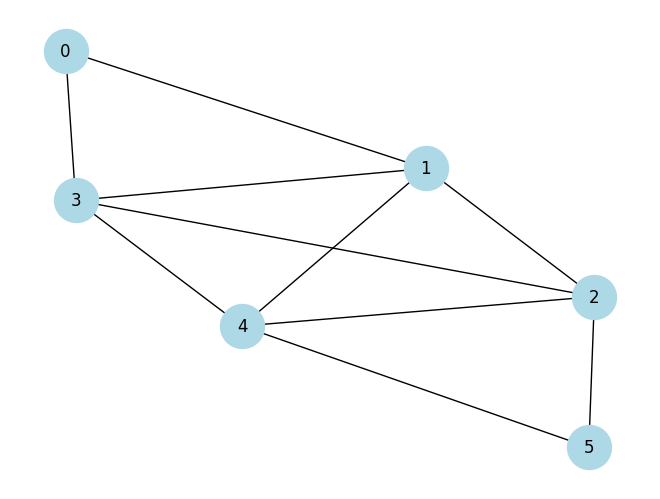

In [9]:
import networkx as nx

g = nx.Graph()
g.add_nodes_from([0,1,2,3,4,5])
g.add_edge(0,1)
g.add_edge(0,3)
g.add_edge(1,2)
g.add_edge(1,3)
g.add_edge(2,1)
g.add_edge(2,4)
g.add_edge(2,5)
g.add_edge(3,2)
g.add_edge(3,4)
g.add_edge(4,1)
g.add_edge(4,5)

pos = nx.spring_layout(g)
nx.draw(g, pos, with_labels=True, node_size=1000, node_color='lightblue')

Using `g.neighbors(node)`, we can iterate over all neighbors of a `node` in the graph:

In [10]:
for n in g.neighbors(5):
    print(n)

2
4


We use a queue to visit all reachable nodes from the given start node. We maintain a set `seen` of the nodes that we have already visited to process every node only once.

In [11]:
def visit_all(graph, start):
    q = Queue()
    q.enqueue(start)
    seen = {start}
    while not q.is_empty():
        node = q.dequeue()
        print(node)
        for n in graph.neighbors(node):
            if n not in seen:
                seen.add(n)
                q.enqueue(n)
                

In [12]:
visit_all(g, 5)

5
2
4
1
3
0


We will later in the course (Chapter C1) discuss the algorithm in detail when we talk about graph exploration.